<a href="https://colab.research.google.com/github/flookyteeco2005/Bigdata/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSIGNMENT SUBMITTED BY FOLAKEMI TOYIN GBADAMOSI**

# Simple Housing Dataset

# Create a regression model that predicts the price of boston house bold text

# **Instructions**
	

#    Extract data with pandas
#    Process data if neededd (replace missing values, normalization, etc)
#    Define model in Keras
#    Train model
#    Plot metrics with matplotlib


In [0]:
!wget https://storage.googleapis.com/nicksdemobucket/housing-data.csv

--2019-04-22 21:40:14--  https://storage.googleapis.com/nicksdemobucket/housing-data.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 816 [application/octet-stream]
Saving to: ‘housing-data.csv.5’

housing-data.csv.5  100%[===================>]     816  --.-KB/s    in 0s      

2019-04-22 21:40:14 (21.9 MB/s) - ‘housing-data.csv.5’ saved [816/816]



In [0]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot 

In [0]:
# Install dependencies
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
Double check with Python 3


# **To Extract data with pandas**

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense, Flatten

print(tf.VERSION)
print(tf.keras.__version__)

1.13.1
2.2.4-tf


MNIST

Extract data with pandas

In [0]:
data = pd.read_csv('housing-data.csv')
#prices = data['price']
#features = data.drop('price', axis = 1)

features = np.random.random((1000, 32))
labels = np.random.random((1000, 10))

# **Process data if neededd (replace missing values, normalization, etc)**

In [0]:
data.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


# Generate dummy data

In [0]:
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)


# **Define model in Keras**
Multilayer Perceptron (MLP) for multi-class softmax classification

The Sequential model is a linear stack of layers.

This can create a Sequential model by passing a list of layer instances to the constructor:

In [0]:
# maximum simplicity
seq_model = Sequential()
seq_model.add(Dense(20, activation='relu', input_shape=(32,)))
seq_model.add(Dense(20, activation='relu'))
seq_model.add(Dense(10, activation='softmax'))

seq_model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

seq_model.fit(features, labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s 246us/sample - loss: 11.6076 - acc: 0.1050
Epoch 2/10
1000/1000 [==============================] - 0s 100us/sample - loss: 11.5211 - acc: 0.0980
Epoch 3/10
1000/1000 [==============================] - 0s 104us/sample - loss: 11.5117 - acc: 0.1090
Epoch 4/10
1000/1000 [==============================] - 0s 100us/sample - loss: 11.5076 - acc: 0.1070
Epoch 5/10
1000/1000 [==============================] - 0s 97us/sample - loss: 11.5046 - acc: 0.1020
Epoch 6/10
1000/1000 [==============================] - 0s 111us/sample - loss: 11.5022 - acc: 0.1040
Epoch 7/10
1000/1000 [==============================] - 0s 98us/sample - loss: 11.5006 - acc: 0.1030
Epoch 8/10
1000/1000 [==============================] - 0s 101us/sample - loss: 11.4997 - acc: 0.1130
Epoch 9/10
1000/1000 [==============================] - 0s 100us/sample - loss: 11.4985 - acc: 0.1060
Epoch 10/10
1000/1000 [==============================] - 0s 102us/sample - loss: 11.

Before training a model, we need to configure the learning process, which is done via the compile method. It receives three arguments:

1. An optimizer. This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class.

2. A loss function. This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function.

3. A list of metrics. For any classification problem you will want to set this to metrics=["accuracy"] . A metric could be the string identifier of an existing metric or a custom metric function.

In [0]:
# more full featured and flexible
inputs = keras.Input(shape=(32,))
x = Dense(20, activation='relu')(inputs)
x = Dense(20, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

func_model = keras.Model(inputs, outputs)
func_model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
func_model.fit(features, labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s 240us/sample - loss: 11.5643 - acc: 0.1070
Epoch 2/10
1000/1000 [==============================] - 0s 90us/sample - loss: 11.5168 - acc: 0.1070
Epoch 3/10
1000/1000 [==============================] - 0s 122us/sample - loss: 11.5098 - acc: 0.1150
Epoch 4/10
1000/1000 [==============================] - 0s 93us/sample - loss: 11.5062 - acc: 0.1110
Epoch 5/10
1000/1000 [==============================] - 0s 93us/sample - loss: 11.5036 - acc: 0.1150
Epoch 6/10
1000/1000 [==============================] - 0s 98us/sample - loss: 11.5017 - acc: 0.1180
Epoch 7/10
1000/1000 [==============================] - 0s 93us/sample - loss: 11.5002 - acc: 0.1140
Epoch 8/10
1000/1000 [==============================] - 0s 94us/sample - loss: 11.4986 - acc: 0.1210
Epoch 9/10
1000/1000 [==============================] - 0s 95us/sample - loss: 11.4973 - acc: 0.1180
Epoch 10/10
1000/1000 [==============================] - 0s 94us/sample - loss: 11.4962 -

# **Train model**
# Keras models are trained on Numpy arrays of input data and labels. For training a model, we will typically use the fit function.

In [0]:
class ScModel(keras.Model):
  
  def __init__(self):
    super(ScModel, self).__init__()
    self.dense1 = Dense(20, activation='relu')
    self.dense2 = Dense(20, activation='relu')
    self.dense3 = Dense(10, activation='softmax')
    
  def call(self, inputs):
    x = self.dense1(inputs)
    x = self.dense2(x)
    return self.dense3(x)
  
sc_model = ScModel()
sc_model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
sc_model.fit(features, labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s 264us/sample - loss: 11.6415 - acc: 0.0990
Epoch 2/10
1000/1000 [==============================] - 0s 123us/sample - loss: 11.5197 - acc: 0.1000
Epoch 3/10
1000/1000 [==============================] - 0s 116us/sample - loss: 11.5087 - acc: 0.1040
Epoch 4/10
1000/1000 [==============================] - 0s 113us/sample - loss: 11.5045 - acc: 0.1120
Epoch 5/10
1000/1000 [==============================] - 0s 113us/sample - loss: 11.5018 - acc: 0.1120
Epoch 6/10
1000/1000 [==============================] - 0s 108us/sample - loss: 11.5004 - acc: 0.1140
Epoch 7/10
1000/1000 [==============================] - 0s 109us/sample - loss: 11.4989 - acc: 0.1190
Epoch 8/10
1000/1000 [==============================] - 0s 117us/sample - loss: 11.4974 - acc: 0.1240
Epoch 9/10
1000/1000 [==============================] - 0s 112us/sample - loss: 11.4963 - acc: 0.1240
Epoch 10/10
1000/1000 [==============================] - 0s 108us/sample - loss: 1

To Visualize the Model

In [0]:
sc_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             multiple                  660       
_________________________________________________________________
dense_52 (Dense)             multiple                  420       
_________________________________________________________________
dense_53 (Dense)             multiple                  210       
Total params: 1,290
Trainable params: 1,290
Non-trainable params: 0
_________________________________________________________________


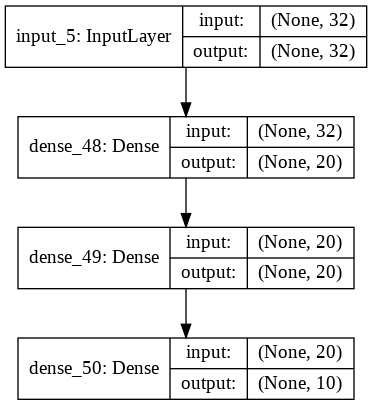

In [0]:
mod = func_model

tf.keras.utils.plot_model(
    mod, 
    to_file='{}.png'.format(mod), 
    show_shapes=True, 
    show_layer_names=True
)

from IPython.display import Image
Image(retina=True, filename='{}.png'.format(mod))

In [0]:
data2 = pd.read_csv('housing-data.csv')
prices = data['price']
features = data.drop('price', axis = 1)

#features = np.random.random((1000, 32))
#labels = np.random.random((1000, 10))

# The data, shuffled and split between train and test sets

In [0]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


#    Plot metrics with matplotlib

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


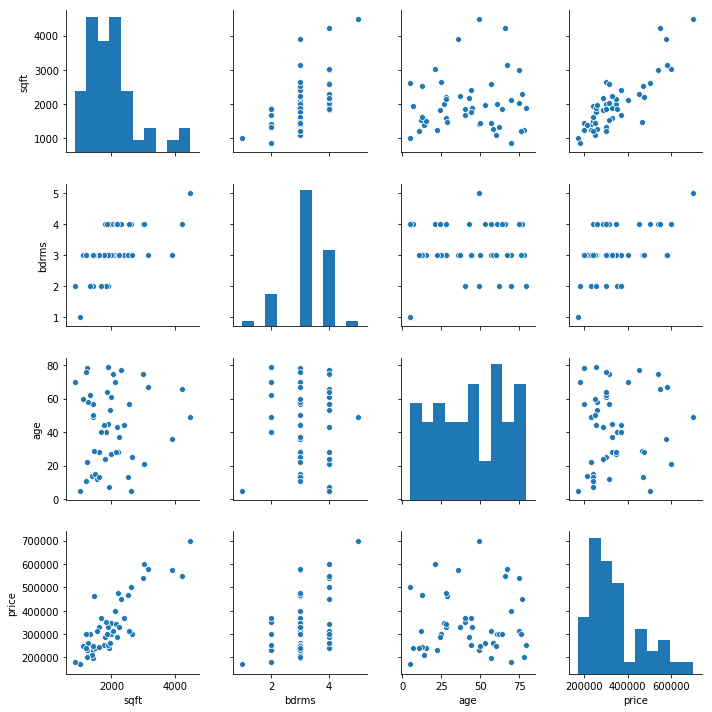

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Calculate and show pairplot
sns.pairplot(data, size=2.5)
plt.tight_layout()

In [0]:
from sklearn.datasets import make_blobs

In [0]:
data1 = make_blobs(n_samples = 510,n_features=2,centers=2,random_state=75)

In [0]:
data1

(array([[  8.35713718,   7.49893947],
        [  8.8949831 ,   7.88178761],
        [  0.79097675,  -9.98011652],
        ...,
        [  7.48630542,   7.47045925],
        [  1.98906591, -10.75738814],
        [  1.32289422,  -6.48525553]]),
 array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 

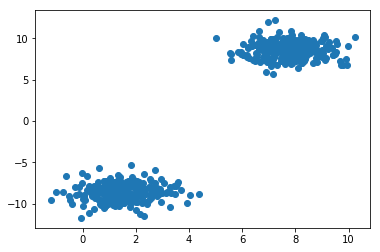

In [0]:
features = data1[0]
plt.scatter(features[:,0],features[:,1])

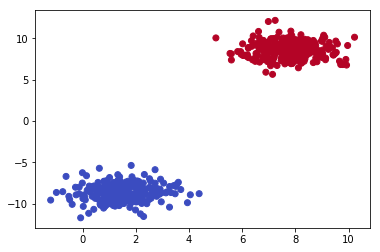

In [0]:
labels = data1[1]
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')

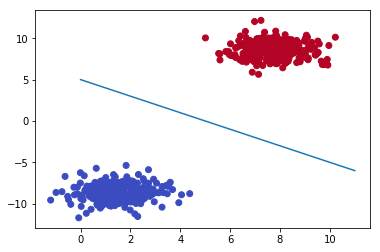

In [0]:
# DRAW A LINE THAT SEPERATES CLASSES
x = np.linspace(0,11,10)
y = -x + 5
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')
plt.plot(x,y)

In [0]:
# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

In [0]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0.0
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			sum_error += error**2
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return weights

In [0]:
#(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
def get_data():
 # the data, shuffled and split between tran and test sets
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(60000, 784)[:max_train_samples]
    X_test = X_test.reshape(10000, 784)[:max_test_samples]
    X_train = X_train.astype("float32") / 255
    X_test = X_test.astype("float32") / 255

    # convert class vectors to binary class matrices
    y_train = y_train[:max_train_samples]
    y_test = y_test[:max_test_samples]
    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)
    test_ids = np.where(y_test == np.array(weighted_class))[0]

    return (X_train, Y_train), (X_test, Y_test), test_ids 

In [0]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [0]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

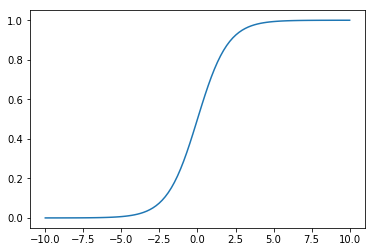

In [0]:
plt.plot(sample_z,sample_a)

Defining the Perceptron
y=mx+b

y=−x+5

f1=mf2+b,m=1

f1=−f2+5

f1+f2−5=0

Convert to a Matrix Representation of Features

wTx+b=0

(1,1)f−5=0

Then if the result is > 0 its label 1, if it is less than 0, it is label=0
